In [1]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from matplotlib import patches
from utils import *
from SISE2 import SISE as sise
import os
import xml.etree.ElementTree as ET
import time
import pandas as pd
from IPython.display import clear_output
import torch
import torch.nn as nn
from torchvision.models import vgg16, resnet50
from torchinfo import summary
import torchvision.transforms as transforms

In [2]:
classese = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13,
 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}
# classese = {'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}

label_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/Annotations'
test_data_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/test'
img_name_list = []

for class_name, class_index in classese.items():
    # print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        img_name_list.append((class_name, annotation))


In [3]:
# GPU를 사용할 수 있다면 사용합니다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('resnet50_voc2007_synth.pth', map_location=device)
model.to(device).eval()
# model.load_state_dict(ckpt, strict=False)
# model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], device=device, grouping_thr=0.5, detail=0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
ac_sise.attribution_masks_compress()
# ac_sise.new_attribution_masks_compress1(1)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

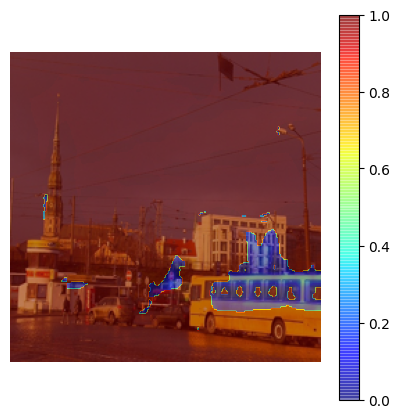

In [33]:
# SISE
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result.cpu().numpy()), cmap='jet', alpha=0.5)
plt.colorbar()
ax = plt.gca()
# rect1 = patches.Rectangle((anno_bbox['xmin'], anno_bbox['ymin']), anno_bbox['w'], anno_bbox['h'], linewidth=2, edgecolor='g', facecolor='none')
# rect2 = patches.Rectangle((bbox[1], bbox[0]), (bbox[3]-bbox[1]), (bbox[2]-bbox[0]), linewidth=2, edgecolor='r', facecolor='none')
# ax.add_patch(rect1)
# ax.add_patch(rect2)
plt.axis('off')
plt.show()

In [ ]:
tree = ET.parse(f'{label_path}/{test_data.replace(".jpg", ".xml")}')
root = tree.getroot()
anno_bbox = get_label(root)
bbox = generate_bbox(normalization(ac_sise.result), 0.2)

In [ ]:
# SISE
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
# plt.colorbar()
# ax = plt.gca()
# rect1 = patches.Rectangle((anno_bbox['xmin'], anno_bbox['ymin']), anno_bbox['w'], anno_bbox['h'], linewidth=2, edgecolor='g', facecolor='none')
# rect2 = patches.Rectangle((bbox[1], bbox[0]), (bbox[3]-bbox[1]), (bbox[2]-bbox[0]), linewidth=2, edgecolor='r', facecolor='none')
# ax.add_patch(rect1)
# ax.add_patch(rect2)
plt.axis('off')
plt.show()

In [21]:
# 바운딩 박스 유사도
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
ac_sise.attribution_masks_compress()
# ac_sise.new_attribution_masks_compress1(1)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

TypeError: to() received an invalid combination of arguments - got (float), but expected one of:
 * (torch.device device, torch.dtype dtype, bool non_blocking, bool copy, *, torch.memory_format memory_format)
 * (torch.dtype dtype, bool non_blocking, bool copy, *, torch.memory_format memory_format)
 * (Tensor tensor, bool non_blocking, bool copy, *, torch.memory_format memory_format)


In [ ]:
# Bitwise 유사도1
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
# ac_sise.attribution_masks_compress()
ac_sise.new_attribution_masks_compress1(1)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
# Bitwise 유사도2
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
# ac_sise.attribution_masks_compress()
ac_sise.new_attribution_masks_compress1(2)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
# SSIM
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
# ac_sise.attribution_masks_compress()
ac_sise.new_attribution_masks_compress2()
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.axis('off')
plt.show()

In [ ]:
g = ac_sise.group_fmaps

In [ ]:
fmap = ac_sise.postprocessed_feature_maps

In [ ]:
ssim_fmap = ac_sise.postprocessed_feature_maps

In [ ]:
for i in g['conv3'][2]:
    plt.imshow(i, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
ssim_fmap['conv3'][:,:,2]

In [ ]:
a = otsu_binary(ac_sise.postprocessed_feature_maps['conv3'][:,:,9])
b = otsu_binary(ac_sise.postprocessed_feature_maps['conv3'][:,:,207])

In [ ]:
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(np.bitwise_and(a, b), cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(np.bitwise_or(a, b), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(ssim_fmap['conv3'][:,:,2], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
classese = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13,
 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}

label_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/Annotations'
test_data_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/test'

In [5]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'resnet50', f'{test_data_path}/{class_name}/{annotation}', class_index, device=device, grouping_thr=0.5, detail=0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.attribution_masks_compress()
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./resnet50_result/AC_SISE_0817/AC_SISE_resnet50_{class_name}_0817_iou0.5.xlsx')

aeroplane


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

# ResNet50

# NEW AC-SISE1 (mask1 & mask2 / mask1)

In [ ]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'resnet50', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(1)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./resnet50_result/NEW_AC_SISE1_0303/NEW_AC_SISE1_resnet50_{class_name}_0303_iou0.5.xlsx')

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.colorbar()
ax = plt.gca()
rect1 = patches.Rectangle((anno_bbox['xmin'], anno_bbox['ymin']), anno_bbox['w'], anno_bbox['h'], linewidth=2, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((bbox[1], bbox[0]), (bbox[3]-bbox[1]), (bbox[2]-bbox[0]), linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [ ]:
print('Mean EBPG:', sum(ebpg_result)/len(ebpg_result))
print('Mean IoU:', sum(iou_result)/len(iou_result))
print('Mean elapsed time:', sum(elapsed_time_list)/len(elapsed_time_list))
print('Mean total reduction rate:', sum(total_reduction_rate_list)/len(total_reduction_rate_list))

In [ ]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})

In [ ]:
df.to_excel(excel_writer='NEW_AC_SISE1_resnet50_iou0.5.xlsx')

# NEW AC-SISE2 (mask1 & mask2 / mask1 | mask2)

In [ ]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'resnet50', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(2)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./resnet50_result/NEW_AC_SISE2_0307/NEW_AC_SISE2_resnet50_{class_name}_0307_iou0.5.xlsx')

In [ ]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE2_resnet50_iou0.5.xlsx')

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.colorbar()
ax = plt.gca()
rect1 = patches.Rectangle((anno_bbox['xmin'], anno_bbox['ymin']), anno_bbox['w'], anno_bbox['h'], linewidth=2, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((bbox[1], bbox[0]), (bbox[3]-bbox[1]), (bbox[2]-bbox[0]), linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [ ]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'resnet50', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress2()
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        clear_output
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./resnet50_result/NEW_AC_SISE3_0310/NEW_AC_SISE3_resnet50_{class_name}_0307_iou0.5.xlsx')

In [ ]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE3_resnet50_iou0.5.xlsx')

# VGG16

In [ ]:
tf.keras.backend.clear_session()
model = load_model('model/vgg16_voc2007')

# NEW AC-SISE1 (mask1 & mask2 / mask1)

In [ ]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'vgg16', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(1)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./vgg16_result/NEW_AC_SISE1/NEW_AC_SISE1_vgg16_{class_name}_iou0.5.xlsx')

In [ ]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE1_vgg16_iou0.5.xlsx')

# NEW AC-SISE2 (mask1 & mask2 / mask1 | mask2)

In [ ]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'vgg16', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(2)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./vgg16_result/NEW_AC_SISE2/NEW_AC_SISE2_vgg16_{class_name}_iou0.5.xlsx')

In [ ]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE2_vgg16_iou0.5.xlsx')

# NEW AC-SISE3 (SSIM)

In [ ]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'vgg16', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress2()
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./vgg16_result/NEW_AC_SISE3/NEW_AC_SISE3_vgg16_{class_name}_iou0.5.xlsx')

In [ ]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE3_vgg16_iou0.5.xlsx')